<a href="https://colab.research.google.com/github/ClaudeCoulombe/VIARENA/blob/master/Labos/Petites_experiences_avec_la_convolution.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Rappel - Fonctionnement d'un carnet web iPython

* Pour exécuter le code contenu dans une cellule d'un carnet iPython, cliquez dans la cellule et faites (⇧↵, shift-enter) 
* Le code d'un carnet iPython s'exécute séquentiellement de haut en bas de la page. Souvent, l'importation d'une bibliothèque Python ou l'initialisation d'une variable est préalable à l'exécution d'une cellule située plus bas. Il est donc recommandé d'exécuter les cellules en séquence. Enfin, méfiez-vous des retours en arrière qui peuvent réinitialiser certaines variables.

# Petites expériences le sous-échantillonnage

Vous allez expérimenter l'application du sous-échantillonage pour rédure la taille des représentations en sortie d'une couche convolutive. Dans un premier temps sur des images synthétiques puis sur une image de chevreuil faisant partie du jeu de données CIFAR-10. 

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def sous_echantillonnage(image):
    filtre = np.array([[1,1],[1,1]]) 
    representation = np.zeros([image.shape[0]//2,
                               image.shape[1]//2])
#     print("representation:\n",representation)
    # Balayage de l'image
    for ligne in range(0,image.shape[0]-1,2):
        for col in range(0,image.shape[1]-1,2):
            # Calcul du sous-échantillon
            zone_a_reduire = image[ligne:ligne+2,col:col+2]*filtre
#             print("zone_a_reduire:\n",zone_a_reduire)
#             print("valeur max:",np.max(zone_a_reduire))
            representation[ligne//2, col//2] = np.max(zone_a_reduire)
    return representation

image:
 [[1 0 1 0 1 0]
 [0 1 0 1 0 1]
 [1 0 1 0 1 0]
 [0 1 0 1 0 1]
 [1 0 1 0 1 0]
 [0 1 0 1 0 1]]


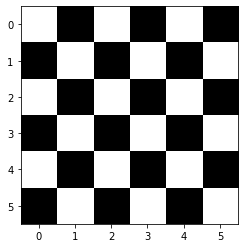


Résultat sous-échantillon:
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


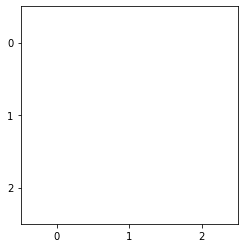

In [75]:
# image synthétique d'un damier
image = np.array([[1,0,1,0,1,0],
                  [0,1,0,1,0,1],
                  [1,0,1,0,1,0],
                  [0,1,0,1,0,1],
                  [1,0,1,0,1,0],
                  [0,1,0,1,0,1]
                 ])

print("image:\n",image)

plt.imshow(image,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

resultat_sousEchantillon = sous_echantillonnage(image)
print("\nRésultat sous-échantillon:\n",resultat_sousEchantillon)

plt.yticks(range(0, resultat_sousEchantillon.shape[0]))
plt.xticks(range(0, resultat_sousEchantillon.shape[1]))
plt.imshow(resultat_sousEchantillon,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

**Note:** Chaque fenêtre de 2 x 2 de notre damier régulier contient un pixel à 1. Le résultat est donc une image avec tout les pixels à 1, soit un carré blanc.


image:
 [[0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]]


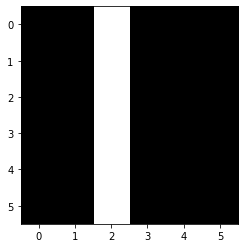


Résultat sous-échantillon:
 [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


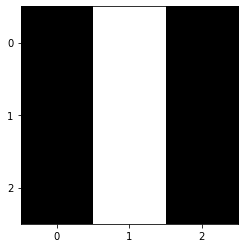

In [76]:
# image synthétique comportant une ligne verticale
image = np.array([[0,0,1,0,0,0],
                  [0,0,1,0,0,0],
                  [0,0,1,0,0,0],
                  [0,0,1,0,0,0],
                  [0,0,1,0,0,0],
                  [0,0,1,0,0,0]
                 ])

print("image:\n",image)

plt.imshow(image,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

resultat_sousEchantillon = sous_echantillonnage(image)
print("\nRésultat sous-échantillon:\n",resultat_sousEchantillon)

plt.yticks(range(0, resultat_sousEchantillon.shape[0]))
plt.xticks(range(0, resultat_sousEchantillon.shape[1]))
plt.imshow(resultat_sousEchantillon,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

**Note:** Ici, la ligne verticale a été détectée par le filtre.

image:
 [[0 0 0 1 1 0 0 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 1 1 0 0 0]]


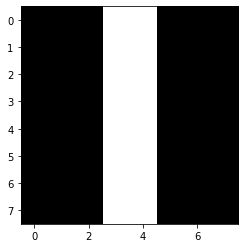


Résultat sous-échantillon:
 [[0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]]


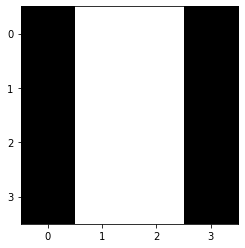

In [77]:
# image synthétique comportant une ligne verticale
image = np.array([[0, 0, 0, 1, 1, 0, 0, 0],
                 [0, 0, 0, 1, 1, 0, 0, 0],
                 [0, 0, 0, 1, 1, 0, 0, 0],
                 [0, 0, 0, 1, 1, 0, 0, 0],
                 [0, 0, 0, 1, 1, 0, 0, 0],
                 [0, 0, 0, 1, 1, 0, 0, 0],
                 [0, 0, 0, 1, 1, 0, 0, 0],
                 [0, 0, 0, 1, 1, 0, 0, 0]])

print("image:\n",image)

plt.imshow(image,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

resultat_sousEchantillon = sous_echantillonnage(image)
print("\nRésultat sous-échantillon:\n",resultat_sousEchantillon)

plt.yticks(range(0, resultat_sousEchantillon.shape[0]))
plt.xticks(range(0, resultat_sousEchantillon.shape[1]))
plt.imshow(resultat_sousEchantillon,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

## Expérience avec une photo de chevreuil en tons de gris

Image originale: (32, 32)


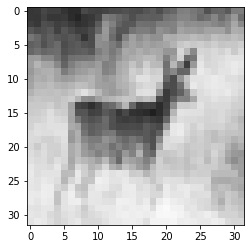


Résultat sous-échantillon: (16, 16)


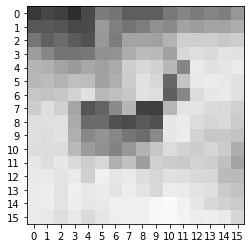

In [81]:
chemin_data = "https://cours.edulib.org/asset-v1:Cegep-Matane+VAERN.1FR+P2021+type@asset+block@"

# Image source
image = plt.imread(chemin_data+"Chevreuil-0621_rouge-blanc_noir.png")
print("Image originale:",image.shape)

plt.imshow(image,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()

# Sous-échantillonnage de l'image
resultat_sousEchantillon = sous_echantillonnage(image)
print("\nRésultat sous-échantillon:",resultat_sousEchantillon.shape)
plt.yticks(range(0, resultat_sousEchantillon.shape[0]))
plt.xticks(range(0, resultat_sousEchantillon.shape[1]))
plt.imshow(resultat_sousEchantillon,cmap=plt.get_cmap('gray'),vmin=0,vmax=1)
plt.show()
